In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from joblib import dump, load
from IPython.display import display, HTML
import lime.lime_tabular
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

@echo off
ECHO Setting up virtual environment and requirements file...

:: Set the directory to the script's location
cd /d "C:\Users\OMEN 16\Desktop\Teesside DS courses - Sem 1\Projects\ai_ethics_projects\employee_promotion"

:: Create virtual environment named 'venv'
python -m venv venv

:: Activate the virtual environment
call venv\Scripts\activate

:: Upgrade pip to the latest version
python -m pip install --upgrade pip

:: Install required packages
pip install numpy pandas matplotlib seaborn scikit-learn joblib lime

:: Generate requirements.txt
pip freeze > requirements.txt

:: Deactivate the virtual environment
deactivate

ECHO Virtual environment created and requirements.txt generated in %CD%
pause

In [2]:
FileLocation = os.getcwd()

print("The File Location: ", os.getcwd())

The File Location:  c:\Users\OMEN 16\Desktop\teesside_ds_courses\projects\ai_ethics_projects\employee_promotion


In [3]:
EmployeePromotion = pd.read_csv('train.csv')
EmployeePromotion.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            0  
1                  4            0                  60            0  
2                  7            0                  50            0  
3                 10            0                  50            0  
4                  2            0                  73            0

In [4]:
EmployeePromotion.shape

(54808, 13)

In [5]:
EmployeePromotion.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score   is_promoted  
count       54808.000000  54808.000000        54808.000000  54808.000000  
mean            5.865512      0.023172           63.386750      0.085170  
std             4.265094      0.150450           13.371559      0.279137  
min             1.000000      0.000000           39.000000      0.000000  
25%             3.000000      0.000000           51.000000      0.000000  
50%             5.000000      0.000000           60.000000      0.000000  
75%             7.000000      0.000000           76.000000      0.000000  
max            37.000000      1.000000           99.000000      1.000000

In [6]:
EmployeePromotion.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
EmployeePromotion.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won?  avg_training_score  is_promoted  
54803                 17            0                  78            0  
54804                  6            0                  56            0  
54805                  3            0                  79            0  
54806                  2            0                  45            0  
54807                  5            0                  49            0

In [8]:
EmployeePromotion.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
EmployeePromotion["education"].fillna(value=EmployeePromotion["education"].mode()[0], inplace=True)

In [10]:
EmployeePromotion["previous_year_rating"].fillna(value=EmployeePromotion["previous_year_rating"].median(), inplace=True)

In [11]:
EmployeePromotion.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
EmployeePromotion.describe(include=['object'])

department    region   education gender recruitment_channel
count               54808     54808       54808  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       39078  38496               30446

In [13]:
EmployeePromotion['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

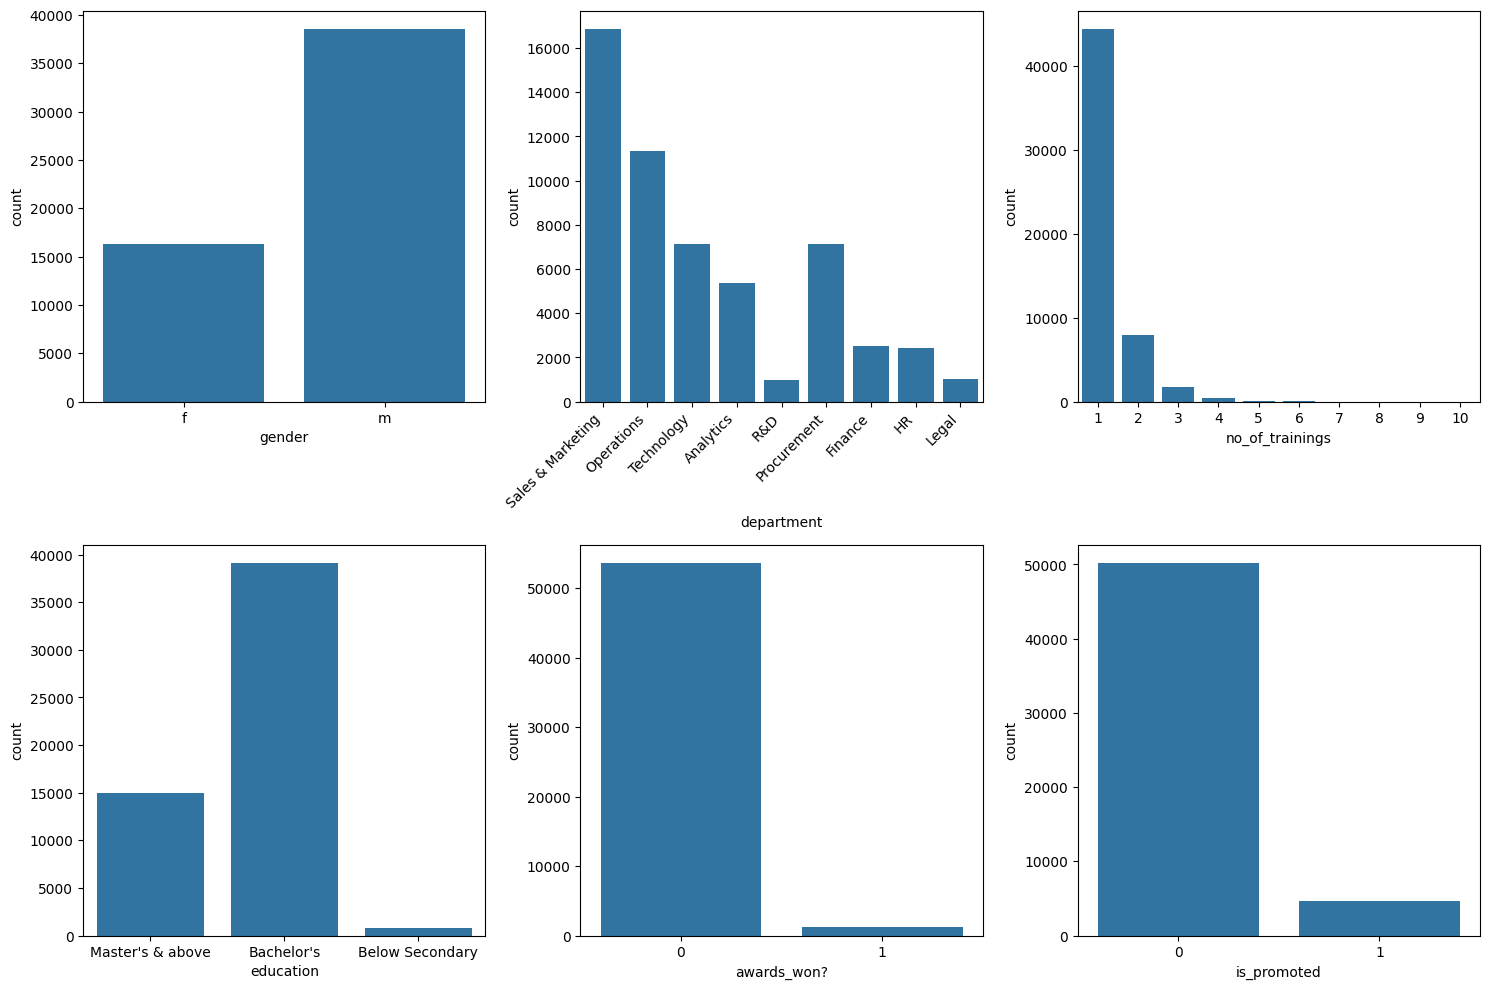

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x="gender", data=EmployeePromotion, ax=ax[0,0])
sns.countplot(x="department", data=EmployeePromotion, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45, ha='right')
sns.countplot(x="no_of_trainings", data=EmployeePromotion, ax=ax[0,2])
sns.countplot(x="education", data=EmployeePromotion, ax=ax[1,0])
sns.countplot(x="awards_won?", data=EmployeePromotion, ax=ax[1,1])
sns.countplot(x="is_promoted", data=EmployeePromotion, ax=ax[1,2])
fig.tight_layout()  
fig.show()

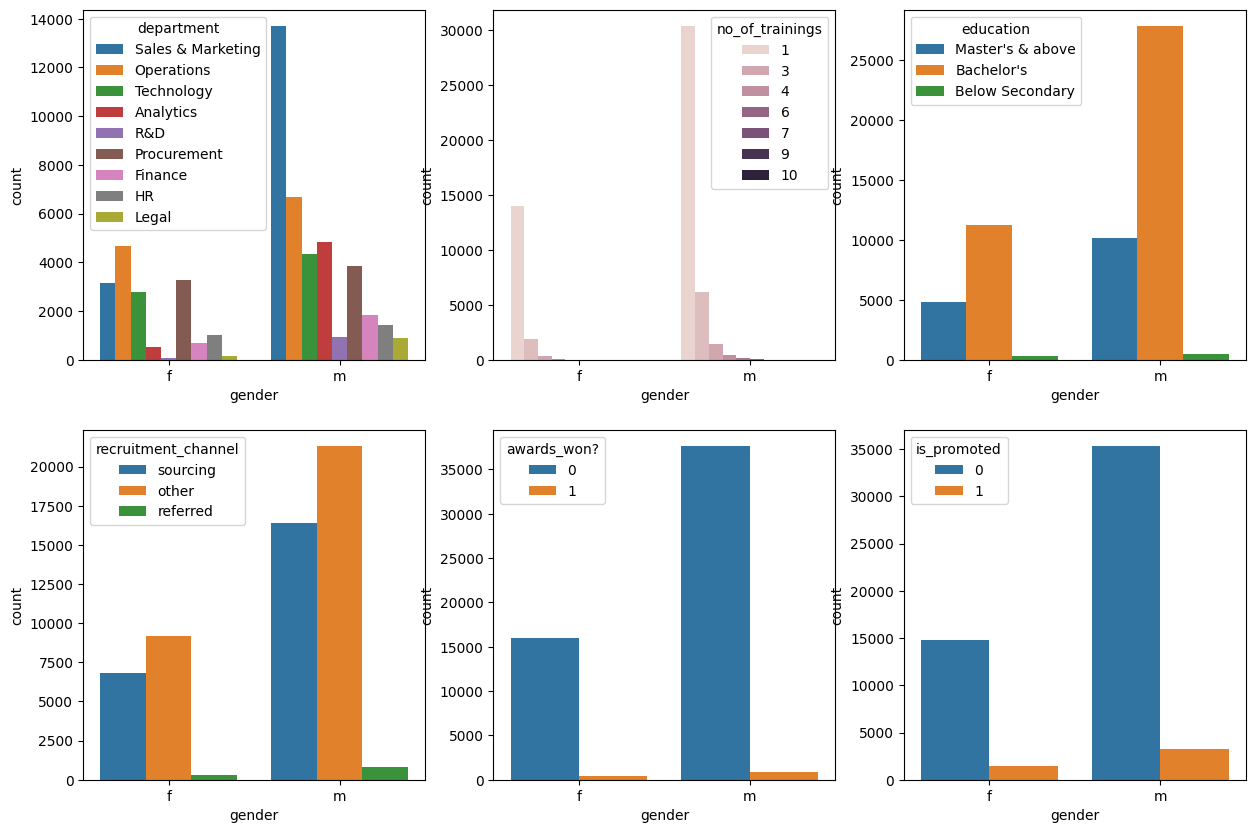

In [15]:
fig, ax = plt.subplots(2,3, figsize=(15, 10))
sns.countplot(x="gender", hue="department", data=EmployeePromotion, ax=ax[0,0])
sns.countplot(x="gender", hue="no_of_trainings", data=EmployeePromotion, ax=ax[0,1])
sns.countplot(x="gender", hue="education", data=EmployeePromotion, ax=ax[0,2])
sns.countplot(x="gender", hue="recruitment_channel", data=EmployeePromotion, ax=ax[1,0])
sns.countplot(x="gender", hue="awards_won?", data=EmployeePromotion, ax=ax[1,1])
sns.countplot(x="gender", hue="is_promoted", data=EmployeePromotion, ax=ax[1,2])
fig.show()

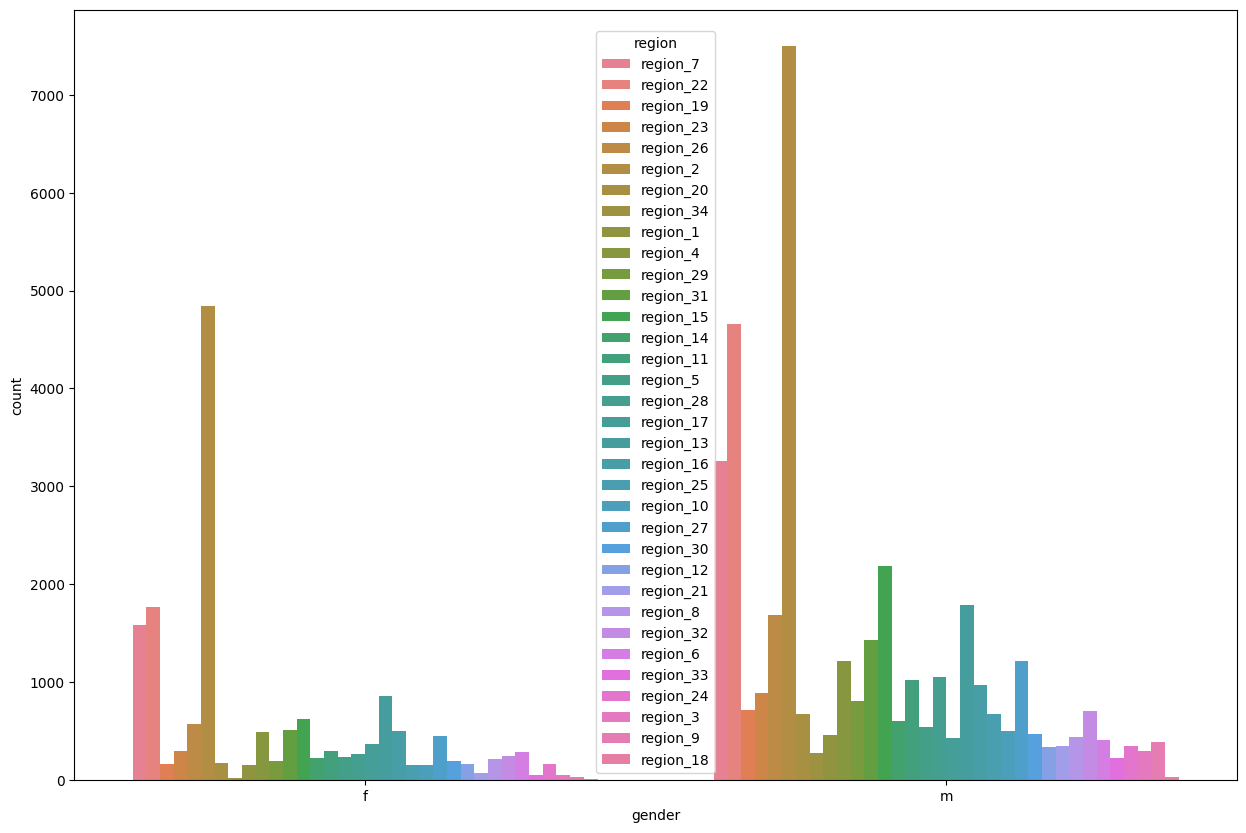

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(x="gender", hue="region", data=EmployeePromotion, ax=ax)
fig.show()

In [17]:
EmployeePromotion.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

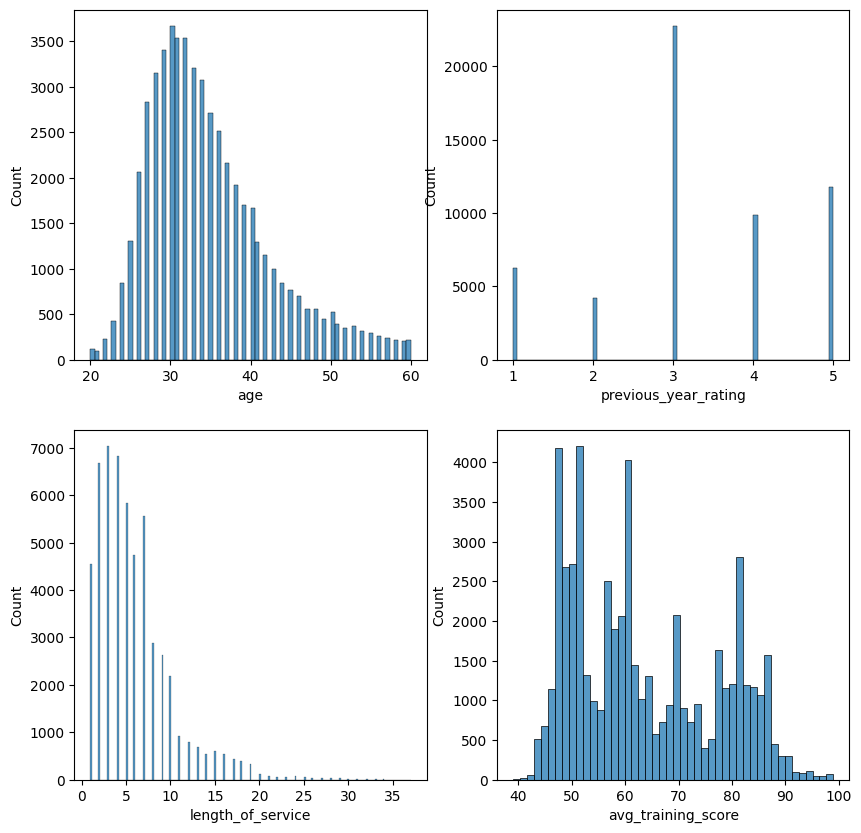

In [18]:
# Create a 2x3 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot histograms for each numerical feature
sns.histplot(x="age", data=EmployeePromotion, ax=ax[0, 0])
sns.histplot(x="previous_year_rating", data=EmployeePromotion, ax=ax[0, 1])
sns.histplot(x="length_of_service", data=EmployeePromotion, ax=ax[1, 0])
sns.histplot(x="avg_training_score", data=EmployeePromotion, ax=ax[1, 1])

# Display the figure
fig.show()

In [19]:
EmployeePromotion.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          54808.000000   
mean   39195.830627         1.253011     34.803915              3.304481   
std    22586.581449         0.609264      7.660169              1.214770   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score   is_promoted  
count       54808.000000  54808.000000        54808.000000  54808.000000  
mean            5.865512      0.023172           63.386750      0.085170  
std             4.265094      0.150450           13.371559      0.279137  
min             1.000000      0.000000           39.000000      0.000000  
25%             3.000000      0.000000           51.000000      0.000000  
50%             5.000000      0.000000           60.000000      0.000000  
75%             7.000000      0.000000           76.000000      0.000000  
max            37.000000      1.000000           99.000000      1.000000

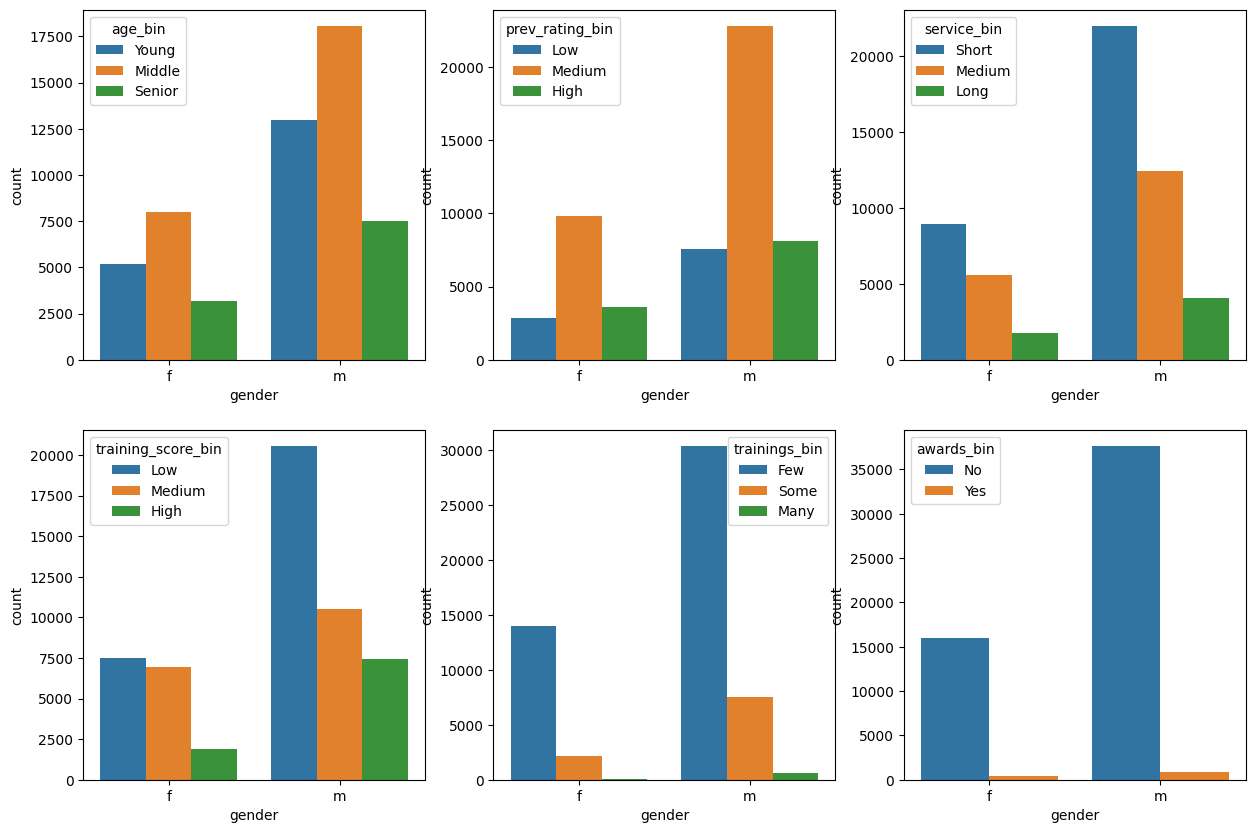

In [20]:
# Bin numerical features into categories for use as hue
EmployeePromotion['age_bin'] = pd.cut(EmployeePromotion['age'], bins=[19, 30, 40, 60], labels=['Young', 'Middle', 'Senior'])
EmployeePromotion['prev_rating_bin'] = pd.cut(EmployeePromotion['previous_year_rating'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
EmployeePromotion['service_bin'] = pd.cut(EmployeePromotion['length_of_service'], bins=[0, 5, 10, 40], labels=['Short', 'Medium', 'Long'])
EmployeePromotion['training_score_bin'] = pd.cut(EmployeePromotion['avg_training_score'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])
EmployeePromotion['trainings_bin'] = pd.cut(EmployeePromotion['no_of_trainings'], bins=[0, 1, 3, 10], labels=['Few', 'Some', 'Many'])
EmployeePromotion['awards_bin'] = pd.cut(EmployeePromotion['awards_won?'], bins=[-1, 0, 1], labels=['No', 'Yes'])  # Binary-like

# Create a 2x3 subplot grid
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Plot count plots with gender as x and binned numerical features as hue
sns.countplot(x="gender", hue="age_bin", data=EmployeePromotion, ax=ax[0, 0])
sns.countplot(x="gender", hue="prev_rating_bin", data=EmployeePromotion, ax=ax[0, 1])
sns.countplot(x="gender", hue="service_bin", data=EmployeePromotion, ax=ax[0, 2])
sns.countplot(x="gender", hue="training_score_bin", data=EmployeePromotion, ax=ax[1, 0])
sns.countplot(x="gender", hue="trainings_bin", data=EmployeePromotion, ax=ax[1, 1])
sns.countplot(x="gender", hue="awards_bin", data=EmployeePromotion, ax=ax[1, 2])

# Display the figure
fig.show()

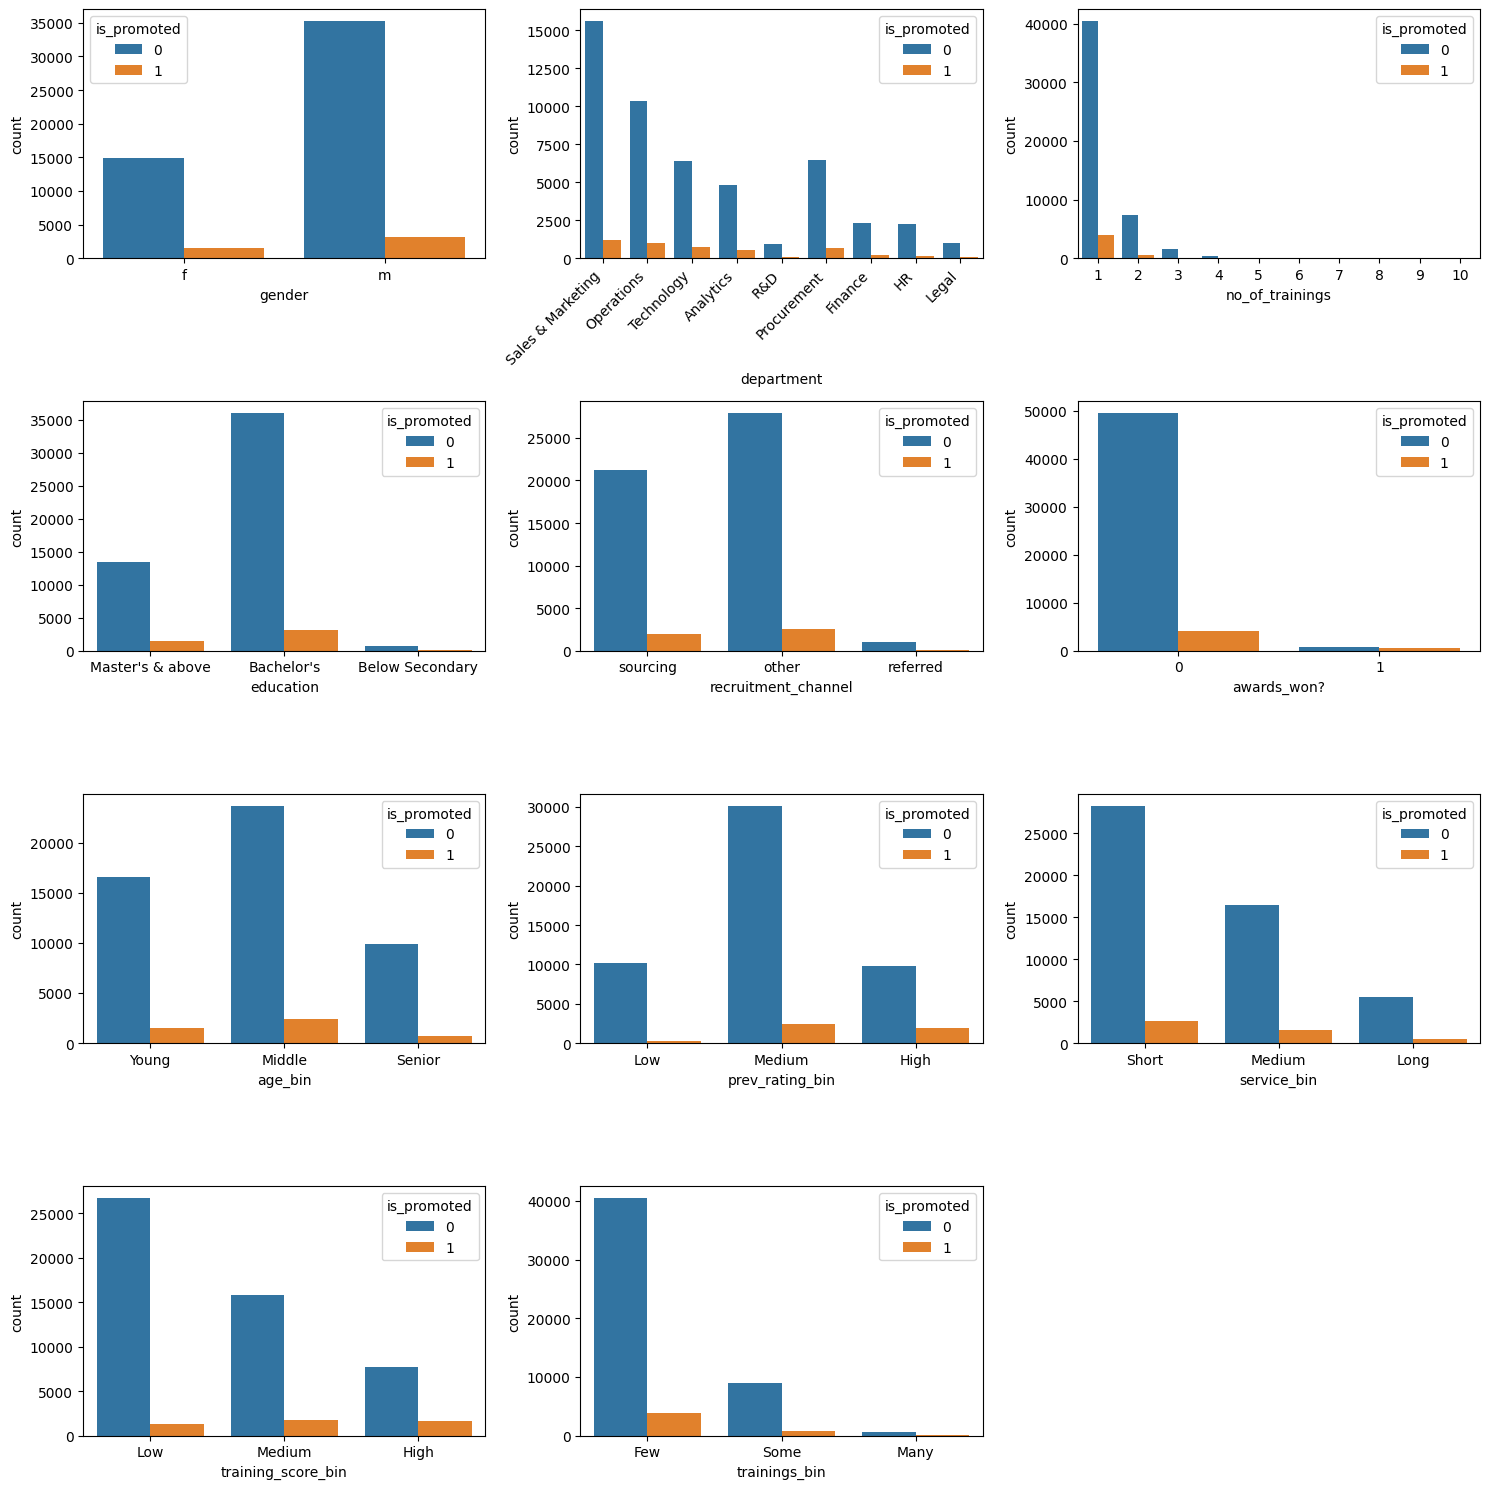

In [21]:
# Create a 4x3 subplot grid
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

# Plot countplots in the specified subplots
sns.countplot(x="gender", hue="is_promoted", data=EmployeePromotion, ax=ax[0, 0])
sns.countplot(x="department", hue="is_promoted", data=EmployeePromotion, ax=ax[0, 1])
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
sns.countplot(x="no_of_trainings", hue="is_promoted", data=EmployeePromotion, ax=ax[0, 2])
sns.countplot(x="education", hue="is_promoted", data=EmployeePromotion, ax=ax[1, 0])
sns.countplot(x="recruitment_channel", hue="is_promoted", data=EmployeePromotion, ax=ax[1, 1])
sns.countplot(x="awards_won?", hue="is_promoted", data=EmployeePromotion, ax=ax[1, 2])
sns.countplot(x="age_bin", hue="is_promoted", data=EmployeePromotion, ax=ax[2, 0])
sns.countplot(x="prev_rating_bin", hue="is_promoted", data=EmployeePromotion, ax=ax[2, 1])
sns.countplot(x="service_bin", hue="is_promoted", data=EmployeePromotion, ax=ax[2, 2])
sns.countplot(x="training_score_bin", hue="is_promoted", data=EmployeePromotion, ax=ax[3, 0])
sns.countplot(x="trainings_bin", hue="is_promoted", data=EmployeePromotion, ax=ax[3, 1])

# Remove the empty subplot at ax[3, 2] to make it not show
ax[3, 2].remove()

# Adjust layout to prevent label overlap
fig.tight_layout()

# Display the figure
plt.show()

In [22]:
EmployeePromotion.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
age_bin                 category
prev_rating_bin         category
service_bin             category
training_score_bin      category
trainings_bin           category
awards_bin              category
dtype: object

In [23]:
# 1. Check for duplicate rows (all columns identical)
duplicate_count = EmployeePromotion.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# 2. Display duplicate rows (if any)
duplicates = EmployeePromotion[EmployeePromotion.duplicated(keep=False)]
if not duplicates.empty:
    print("\nDuplicate rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


In [24]:
EmployeePromotion = EmployeePromotion.drop(columns=['employee_id', 'age_bin', 'prev_rating_bin', 'service_bin', 'training_score_bin', 'trainings_bin', 'awards_bin'],axis=1)
EmployeePromotion.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   35                   5.0                  8            0   
1                1   30                   5.0                  4            0   
2                1   34                   3.0                  7            0   
3                2   39                   1.0                 10            0   
4                1   45                   3.0                  2            0   

   avg_training_score  is_promoted  
0                  49            0  
1                  60            0  
2                  50            0  
3                  50            0  
4                  73            0

In [25]:
# Print unique values for categorical features (object dtype)
categorical_cols = EmployeePromotion.select_dtypes(include=['object']).columns
print("\nUnique Values for Categorical Features (object dtype):")
for col in categorical_cols:
    unique_vals = EmployeePromotion[col].unique()
    print(f"{col}: {unique_vals} (Count: {len(unique_vals)})")


Unique Values for Categorical Features (object dtype):
department: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] (Count: 9)
region: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] (Count: 34)
education: ["Master's & above" "Bachelor's" 'Below Secondary'] (Count: 3)
gender: ['f' 'm'] (Count: 2)
recruitment_channel: ['sourcing' 'other' 'referred'] (Count: 3)


In [26]:
EmployeePromotion["gender"].replace({'m': 1, 'f': 0}, inplace=True)
EmployeePromotion["education"].replace({"Below Secondary": 0, "Bachelor's": 1, "Master's & above": 2}, inplace=True)
EmployeePromotion.head()

department     region  education  gender recruitment_channel  \
0  Sales & Marketing   region_7          2       0            sourcing   
1         Operations  region_22          1       1               other   
2  Sales & Marketing  region_19          1       1            sourcing   
3  Sales & Marketing  region_23          1       1               other   
4         Technology  region_26          1       1               other   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   35                   5.0                  8            0   
1                1   30                   5.0                  4            0   
2                1   34                   3.0                  7            0   
3                2   39                   1.0                 10            0   
4                1   45                   3.0                  2            0   

   avg_training_score  is_promoted  
0                  49            0  
1                  60            0  
2                  50            0  
3                  50            0  
4                  73            0

In [27]:
# Assuming EmployeePromotion is your DataFrame

# List of columns to label encode
EmployeePromotion_Label = ['department', 'region', 'recruitment_channel']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original
EmployeePromotion_encoded = EmployeePromotion.copy()

# Apply label encoding to each specified column
for column in EmployeePromotion_Label:
    # Fit and transform the column, updating the DataFrame
    EmployeePromotion_encoded[column] = label_encoder.fit_transform(EmployeePromotion_encoded[column])
    
    # Optional: Print the mapping for reference
    print(f"\nLabel Encoding for '{column}':")
    unique_values = EmployeePromotion[column].unique()
    encoded_values = EmployeePromotion_encoded[column].unique()
    mapping = dict(zip(unique_values, encoded_values))
    print(mapping)

# Verify the result
print("\nData Types after encoding:\n", EmployeePromotion_encoded.dtypes)
print("\nFirst few rows of the encoded DataFrame:\n", EmployeePromotion_encoded.head())


Label Encoding for 'department':
{'Sales & Marketing': np.int64(7), 'Operations': np.int64(4), 'Technology': np.int64(8), 'Analytics': np.int64(0), 'R&D': np.int64(6), 'Procurement': np.int64(5), 'Finance': np.int64(1), 'HR': np.int64(2), 'Legal': np.int64(3)}

Label Encoding for 'region':
{'region_7': np.int64(31), 'region_22': np.int64(14), 'region_19': np.int64(10), 'region_23': np.int64(15), 'region_26': np.int64(18), 'region_2': np.int64(11), 'region_20': np.int64(12), 'region_34': np.int64(27), 'region_1': np.int64(0), 'region_4': np.int64(28), 'region_29': np.int64(21), 'region_31': np.int64(24), 'region_15': np.int64(6), 'region_14': np.int64(5), 'region_11': np.int64(2), 'region_5': np.int64(29), 'region_28': np.int64(20), 'region_17': np.int64(8), 'region_13': np.int64(4), 'region_16': np.int64(7), 'region_25': np.int64(17), 'region_10': np.int64(1), 'region_27': np.int64(19), 'region_30': np.int64(23), 'region_12': np.int64(3), 'region_21': np.int64(13), 'region_8': np.int6

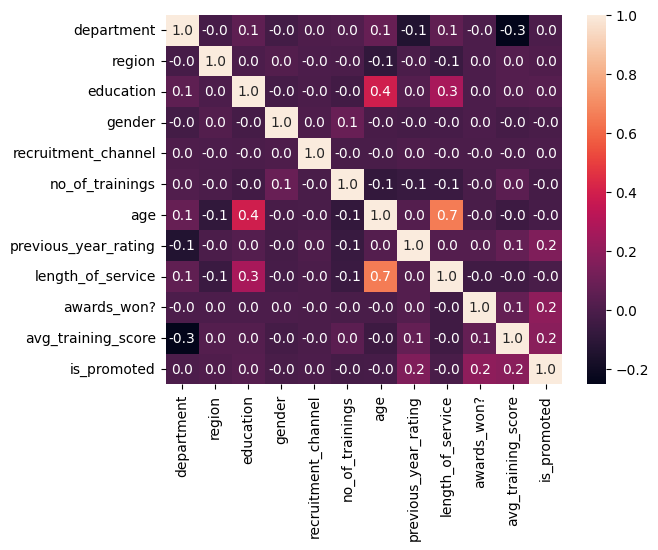

In [28]:
# Calculate the correlation matrix
corr_matrix = EmployeePromotion_encoded.corr()

# Plot heatmap with annotations formatted to 1 decimal place
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

# Display the plot
plt.show()

In [29]:
# Create the attribute and target data:
X=EmployeePromotion_encoded.drop(columns=['is_promoted'],axis=1)
y=EmployeePromotion_encoded['is_promoted']
print(X.head())
print()
print(y.head())

   department  region  education  gender  recruitment_channel  \
0           7      31          2       0                    2   
1           4      14          1       1                    0   
2           7      10          1       1                    2   
3           7      15          1       1                    0   
4           8      18          1       1                    0   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   35                   5.0                  8            0   
1                1   30                   5.0                  4            0   
2                1   34                   3.0                  7            0   
3                2   39                   1.0                 10            0   
4                1   45                   3.0                  2            0   

   avg_training_score  
0                  49  
1                  60  
2                  50  
3                  50  
4 

In [30]:
# Split the data into training and test data using train_test_split() function. :
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(54808, 11) (43846, 11) (10962, 11)


In [31]:
# Initialize the Gradient Boosting model with default parameters
model = GradientBoostingClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

GradientBoostingClassifier()

Feature Importance:
                 Feature  Importance
10    avg_training_score    0.592903
0             department    0.221639
7   previous_year_rating    0.082882
9            awards_won?    0.077190
1                 region    0.014616
6                    age    0.004850
8      length_of_service    0.003046
5        no_of_trainings    0.001470
2              education    0.001403
3                 gender    0.000000
4    recruitment_channel    0.000000


Text(0, 0.5, 'Feature')

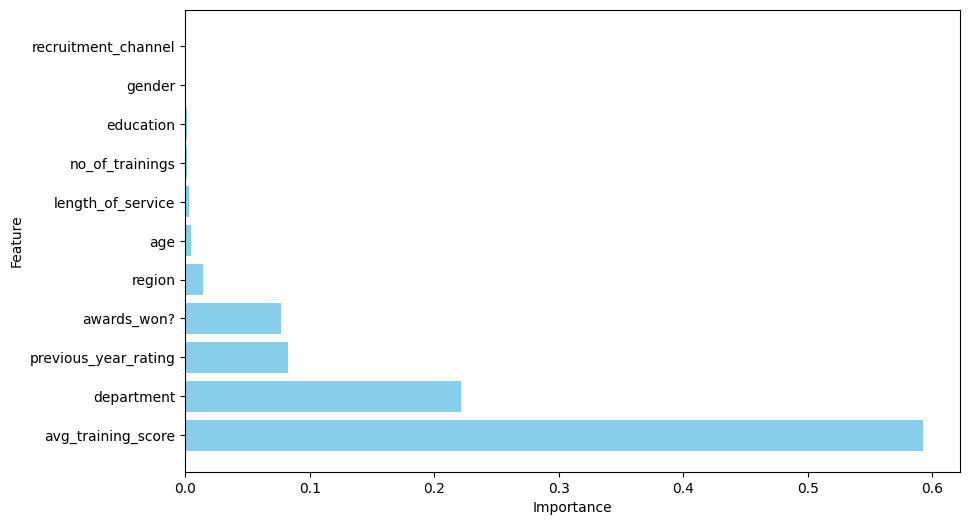

In [32]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:")
print(importance_df)

# Visualize the feature importance using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [33]:
dump(model,"GBC_EmployeePromotion.joblib")

['GBC_EmployeePromotion.joblib']

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
feature_names=X_train.columns,
verbose=True, mode='classification')

In [35]:
explanation = explainer.explain_instance(X_test.iloc[1], model.predict_proba, num_features=11)

Intercept 0.4539225462986109
Prediction_local [0.19743028]
Right: 0.018367729148460545


In [36]:
# Force light background with custom styling if dark theme is the issue
html_content = explanation.as_html(show_table=True)
styled_html = f"""
<div style='background-color: white; color: black; padding: 10px;'>
    {html_content}
</div>
"""
display(HTML(styled_html))

In [37]:
explanation.as_list()

[('awards_won? <= 0.00', -0.2089506515308986),
 ('60.00 < avg_training_score <= 76.00', 0.1290744432670104),
 ('4.00 < department <= 5.00', -0.10480330459754716),
 ('previous_year_rating <= 3.00', -0.09608807702579367),
 ('no_of_trainings <= 1.00', 0.016231244054051245),
 ('1.00 < education <= 2.00', 0.005331500194251642),
 ('29.00 < age <= 33.00', 0.0033025069372496986),
 ('region > 21.00', -0.0030963142643961705),
 ('5.00 < length_of_service <= 7.00', 0.0028829399853877577),
 ('recruitment_channel <= 0.00', -0.0006849013645793046),
 ('0.00 < gender <= 1.00', 0.00030834553674782)]

In [38]:
# Evaluate using the training data
train_predict=model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(y_train, train_predict))
print("Precision on training data:", metrics.precision_score(y_train, train_predict))
print("Recall on training data:", metrics.recall_score(y_train, train_predict))

Accuracy on training data:  0.94042786115039
Precision on training data: 0.9583333333333334
Recall on training data: 0.3141403320835565


In [39]:
# Evaluate using the testing data
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(y_test, test_predict))

Accuracy on testing data:  0.939792008757526
Precision on testing data: 0.9566666666666667
Recall on testing data:  0.30728051391862954


TN=10015, FP=13, FN=647, TP=287


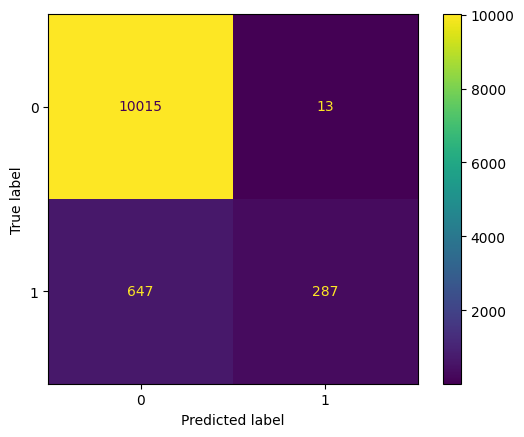

In [40]:
cm = metrics.confusion_matrix(y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.show()

In [41]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
calculated_false_positive_rate = (FP)/(FP+TN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated false positive rate = ", calculated_false_positive_rate)


Calculated accuracy =  0.939792008757526
Calculated precision =  0.9566666666666667
Calculated recall =  0.30728051391862954
Calculated false positive rate =  0.0012963701635420823


In [42]:
PROTECTED  =  "gender" 
MALE =  1.0 
FEMALE = 0.0 
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)
male_indices = np.where(X_test[PROTECTED] == MALE)[0]
female_indices = np.where(X_test[PROTECTED] == FEMALE)[0]
print(male_indices, "No of Male =", male_indices.size)
print(female_indices, "No of Female =", female_indices.size)

gender
1    7748
0    3214
Name: count, dtype: int64
[    0     1     4 ... 10959 10960 10961] No of Male = 7748
[    2     3     6 ... 10951 10952 10958] No of Female = 3214


In [43]:
print(y_test)

1510     0
1066     0
15844    0
8983     0
11453    0
        ..
29596    0
36703    0
29195    1
29043    0
12825    0
Name: is_promoted, Length: 10962, dtype: int64


In [44]:
print(y_test[:20])

1510     0
1066     0
15844    0
8983     0
11453    0
37147    0
21480    0
35204    1
41808    0
39634    0
22445    0
37233    0
37789    0
1979     0
43652    0
34960    0
10869    1
8719     0
15171    0
15880    0
Name: is_promoted, dtype: int64


In [45]:
explanation = explainer.explain_instance(X_test.iloc[7], model.predict_proba)

Intercept 0.41765079990614173
Prediction_local [0.24315709]
Right: 0.06069575736734795


In [46]:
# Force light background with custom styling if dark theme is the issue
html_content = explanation.as_html(show_table=True)
styled_html = f"""
<div style='background-color: white; color: black; padding: 10px;'>
    {html_content}
</div>
"""
display(HTML(styled_html))

In [47]:
explanation.as_list()

[('awards_won? <= 0.00', -0.20554801676904727),
 ('51.00 < avg_training_score <= 60.00', -0.16384581793119332),
 ('previous_year_rating > 4.00', 0.1269438435705291),
 ('department <= 4.00', 0.041306121101696035),
 ('age <= 29.00', 0.024739189679929795),
 ('no_of_trainings <= 1.00', 0.019022821861841604),
 ('education <= 1.00', -0.006875475342048048),
 ('3.00 < length_of_service <= 5.00', -0.00401069736483667),
 ('region > 21.00', -0.0032993952225926215),
 ('gender <= 0.00', -0.0029262838710745263)]

In [48]:
y_test_m = [y_test.values[i] for i in male_indices]
y_test_f = [y_test.values[i] for i in female_indices]
print(y_test_m)
print(y_test_f)

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)

In [49]:
y_predict_m = [test_predict[i] for i in male_indices]
y_predict_f = [test_predict[i] for i in female_indices]
print(y_predict_m)
print()
print(y_predict_f)

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)

TN=7086, FP=10, FN=449, TP=203


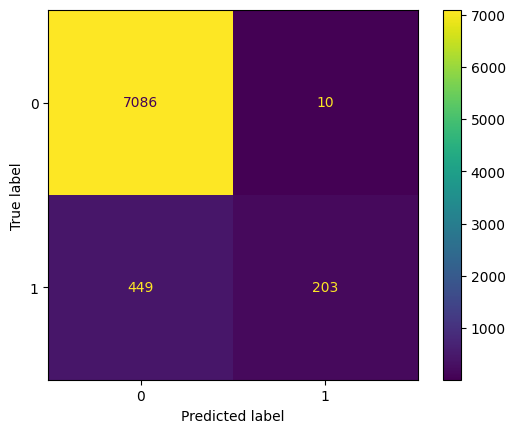

In [50]:
cm_m = metrics.confusion_matrix(y_test_m, y_predict_m)
TN, FP, FN, TP = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp.plot()
plt.show()

In [51]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
calculated_positive_rate = (TP+FP)/(TP+TN+FP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated positive rate = ", calculated_positive_rate)

Calculated accuracy =  0.9407589055240062
Calculated precision =  0.9530516431924883
Calculated recall =  0.3113496932515337
Calculated positive rate =  0.0274909654104285


TN=2929, FP=3, FN=198, TP=84


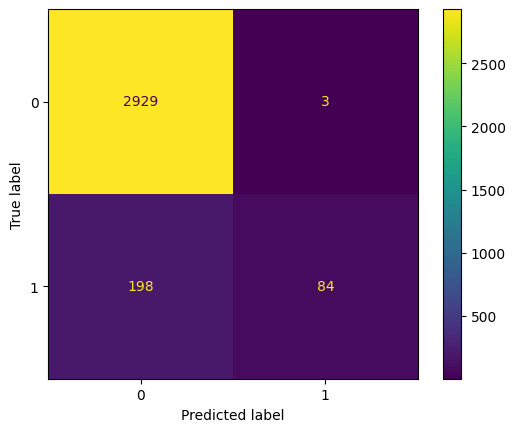

In [52]:
cm_f = metrics.confusion_matrix(y_test_f, y_predict_f)
TN, FP, FN, TP = cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot()
plt.show()

In [53]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
calculated_positive_rate = (TP+FP)/(TP+TN+FP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated positive rate = ", calculated_positive_rate)

Calculated accuracy =  0.9374611076540137
Calculated precision =  0.9655172413793104
Calculated recall =  0.2978723404255319
Calculated positive rate =  0.027069072806471688
